## 0. **Libraries and Mount**

In [1]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

## **Split 미반영 DataFrame 출력**

In [2]:
# 데이터 불러와
dividend_path = 'Data_Dividend'

all_files = os.listdir(dividend_path)
dividend_files = [file for file in all_files if file.endswith('_d.csv')]

# 최종 병합될 데이터프레임 초기화
merged_df = pd.DataFrame()

for file in dividend_files:
    ticker = file.split('_')[0]  # 파일명에서 티커 이름만 추출
    file_path = os.path.join(dividend_path, file)
    df = pd.read_csv(file_path)

    # 'Dividends' 열 이름을 티커 이름으로 변경
    df.rename(columns={'Dividends': ticker}, inplace=True)

    if merged_df.empty:
        merged_df = df  # 첫 번째 데이터프레임을 기준으로 설정
    else:
        # 날짜 기준 병합(결측값 갖는 날짜여도 상관 ㄴㄴ하도록)
        merged_df = pd.merge(merged_df, df, on='Date', how='outer')

# 날짜 기준 정렬
merged_df.sort_values(by='Date', inplace=True)

# 날짜 열 제외하고 티커명에 해당하는 열만 알파벳 순 정렬
sorted_columns = sorted(merged_df.columns[1:])  # 날짜 열(Date) 제외하고 정렬

# 날짜 열을 1열로 + 정렬된 열 순서를 적용
sorted_df = merged_df[['Date'] + sorted_columns]

# 출력
sorted_df


,Date,ABBV,ABT,ADM,ADP,AFL,ALB,AMCR,AOS,APD,...,SHW,SJM,SPGI,SWK,SYY,TGT,TROW,WMT,WST,XOM
5711,1962-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5525,1962-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01875
4235,1962-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4047,1962-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5712,1962-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,2024-03-14,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.24,0.208,NaN,NaN
651,2024-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025,2024-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2199,2024-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **월별로 묶어보자**

In [3]:
# 'Date' 열을 datetime 타입으로 변환
sorted_df['Date'] = pd.to_datetime(sorted_df['Date'])

# 연도와 월만 추출하여 새로운 'YearMonth' 열 생성
sorted_df['YearMonth'] = sorted_df['Date'].dt.to_period('M')

# 'YearMonth' 열을 기준으로 그룹화하고, 'Date' 열을 제외하고 나머지 회사들의 합계를 계산
# 'numeric_only=True'를 설정하여 숫자형 열에만 합계 연산을 적용
monthly_dividends = sorted_df.drop(columns=['Date']) \
                             .groupby('YearMonth', as_index=False) \
                             .sum(numeric_only=True)

# 결과 확인
monthly_dividends

,YearMonth,ABBV,ABT,ADM,ADP,AFL,ALB,AMCR,AOS,APD,...,SHW,SJM,SPGI,SWK,SYY,TGT,TROW,WMT,WST,XOM
0,1962-01,0.00,0.00,0.00,0.0,0.00,0.0,0.000,0.00,0.00,...,0.000,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.00000
1,1962-02,0.00,0.00,0.00,0.0,0.00,0.0,0.000,0.00,0.00,...,0.000,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.01875
2,1962-03,0.00,0.00,0.00,0.0,0.00,0.0,0.000,0.00,0.00,...,0.000,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.00000
3,1962-04,0.00,0.00,0.00,0.0,0.00,0.0,0.000,0.00,0.00,...,0.000,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.00000
4,1962-05,0.00,0.00,0.00,0.0,0.00,0.0,0.000,0.00,0.00,...,0.000,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.01875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2023-11,0.00,0.00,0.45,0.0,0.42,0.0,0.125,0.00,0.00,...,0.605,1.06,0.90,0.81,0.0,1.1,0.00,0.000,0.2,0.95000
732,2023-12,0.00,0.00,0.00,1.4,0.00,0.4,0.000,0.00,1.75,...,0.000,0.00,0.00,0.00,0.0,0.0,1.22,0.190,0.0,0.00000
733,2024-01,1.55,0.55,0.00,0.0,0.00,0.0,0.000,0.32,0.00,...,0.000,0.00,0.00,0.00,0.5,0.0,0.00,0.000,0.2,0.00000
734,2024-02,0.00,0.00,0.50,0.0,0.50,0.0,0.125,0.00,0.00,...,0.715,1.06,0.91,0.00,0.0,1.1,0.00,0.000,0.0,0.95000


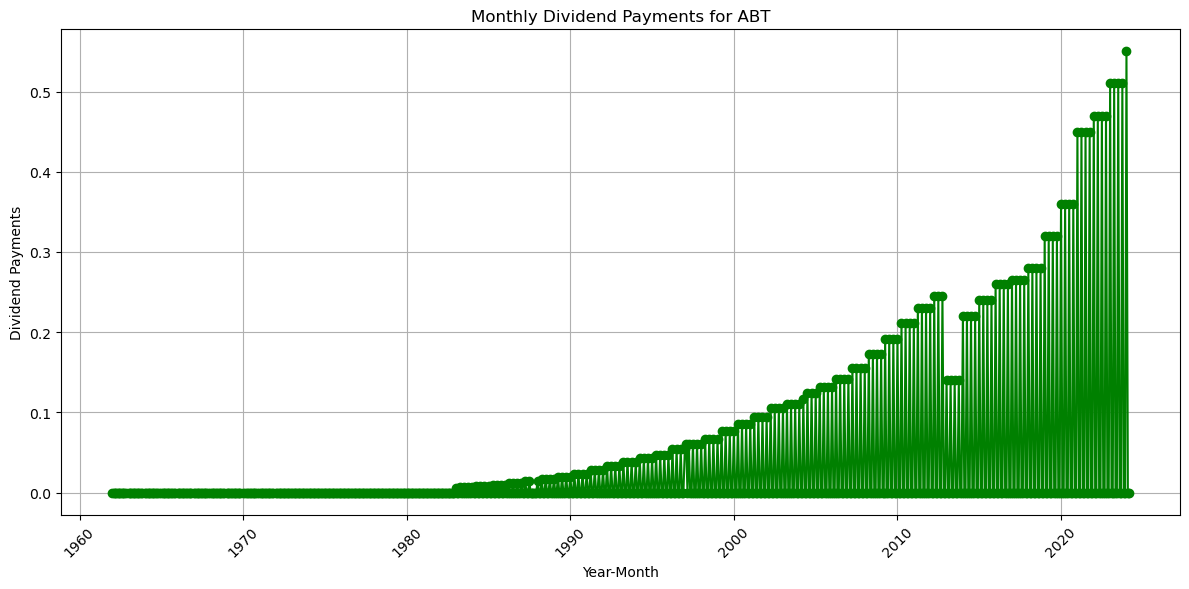

In [15]:
selected_ticker = input("Enter the ticker name you want to visualize: ")

tickers = sorted_df.columns[1:].tolist()  # 'YearMonth' 열 제외

# Assuming 'tickers' list is already defined earlier in the code as the list of column names
# tickers = sorted_df.columns[1:].tolist()  # 'YearMonth' column is excluded

# Convert 'YearMonth' from Period to Timestamp if it is not already done
if not isinstance(monthly_dividends['YearMonth'].iloc[0], pd.Timestamp):
    monthly_dividends['YearMonth'] = monthly_dividends['YearMonth'].dt.to_timestamp()

# Check if the entered ticker is in the data and plot the graph
if selected_ticker in tickers:
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_dividends['YearMonth'], monthly_dividends[selected_ticker], marker='o', linestyle='-', color='green')
    plt.title(f'Monthly Dividend Payments for {selected_ticker}')
    plt.xlabel('Year-Month')
    plt.ylabel('Dividend Payments')
    plt.grid(True)  # Add grid
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Ticker not found. Please enter a valid ticker name.")


In [7]:
# 티커 목록 추출
tickers = sorted_df.columns[1:].tolist()  # 'YearMonth' 열 제외

# 티커별로 그래프를 그릴 subplot의 행과 열 계산
num_tickers = len(tickers)
rows = int(np.ceil(np.sqrt(num_tickers)))
cols = int(np.ceil(num_tickers / rows))

fig, axes = plt.subplots(rows, cols, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Monthly Dividend Payments per Ticker', fontsize=16)

# 서브플롯에 티커별 그래프 그리기
for idx, ticker in enumerate(tickers):
    ax = axes[idx // cols, idx % cols]
    ax.plot(monthly_dividends['YearMonth'], monthly_dividends[ticker], marker='o')
    ax.set_title(ticker)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 빈 서브플롯 제거
for ax in axes.flatten()[num_tickers:]:
    ax.remove()

# 그래프 조정 및 표시
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # 타이틀과 서브플롯 간 여백 조정
plt.show()


Locator attempting to generate 24978 ticks ([-4058.0, ..., 20919.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 24978 ticks ([-4058.0, ..., 20919.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 24978 ticks ([-4058.0, ..., 20919.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 24978 ticks ([-4058.0, ..., 20919.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 24978 ticks ([-4058.0, ..., 20919.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 24978 ticks ([-4058.0, ..., 20919.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 24978 ticks ([-4058.0, ..., 20919.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 24978 ticks ([-4058.0, ..., 20919.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 24978 ticks ([-4058.0, ..., 20919.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting 

In [ ]:
tickers = sorted_df.columns[1:].tolist()

tickers

['ABBV',
 'ABT',
 'ADM',
 'ADP',
 'AFL',
 'ALB',
 'AMCR',
 'AOS',
 'APD',
 'ATO',
 'BDX',
 'BEN',
 'BF-B',
 'BRO',
 'CAH',
 'CAT',
 'CB',
 'CHD',
 'CHRW',
 'CINF',
 'CL',
 'CLX',
 'CTAS',
 'CVX',
 'DOV',
 'ECL',
 'ED',
 'EMR',
 'ESS',
 'EXPD',
 'FRT',
 'GD',
 'GPC',
 'GWW',
 'HRL',
 'IBM',
 'ITW',
 'JNJ',
 'KMB',
 'KO',
 'KVUE',
 'LEG',
 'LIN',
 'LOW',
 'MCD',
 'MDT',
 'MKC',
 'MMM',
 'NDSN',
 'NEE',
 'NUE',
 'O',
 'PEP',
 'PG',
 'PNR',
 'PPG',
 'ROP',
 'SHW',
 'SJM',
 'SPGI',
 'SWK',
 'SYY',
 'TGT',
 'TROW',
 'WMT',
 'WST',
 'XOM']

In [ ]:
import matplotlib.pyplot as plt

# 설정: 모든 티커에 대한 EDA 시각화를 위한 초기화
plt.figure(figsize=(20, 100))

# 각 티커별로 시각화
for i, ticker in enumerate(tickers):
    plt.subplot(len(tickers), 1, i)  # 각 티커별로 서브플롯 할당
    # 날짜를 x축으로, 배당금액을 y축으로 하여 플롯
    plt.plot(sorted_df['Date'], sorted_df[ticker], marker='o', linestyle='-', markersize=2)
    plt.title(f'Dividend Payments Over Time for {ticker}')  # 각 서브플롯의 타이틀 설정
    plt.xlabel('Date')  # x축 라벨 설정
    plt.ylabel('Dividend Amount')  # y축 라벨 설정
    plt.xticks(rotation=45)  # 날짜 라벨 회전

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x788a88f39120> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x788a88f383a0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
for i, ticker in enumerate(tickers):
    print(i,ticker)

0 ABBV
1 ABT
2 ADM
3 ADP
4 AFL
5 ALB
6 AMCR
7 AOS
8 APD
9 ATO
10 BDX
11 BEN
12 BF-B
13 BRO
14 CAH
15 CAT
16 CB
17 CHD
18 CHRW
19 CINF
20 CL
21 CLX
22 CTAS
23 CVX
24 DOV
25 ECL
26 ED
27 EMR
28 ESS
29 EXPD
30 FRT
31 GD
32 GPC
33 GWW
34 HRL
35 IBM
36 ITW
37 JNJ
38 KMB
39 KO
40 KVUE
41 LEG
42 LIN
43 LOW
44 MCD
45 MDT
46 MKC
47 MMM
48 NDSN
49 NEE
50 NUE
51 O
52 PEP
53 PG
54 PNR
55 PPG
56 ROP
57 SHW
58 SJM
59 SPGI
60 SWK
61 SYY
62 TGT
63 TROW
64 WMT
65 WST
66 XOM


## **Split 미반영 DataFrame -> csv**

In [ ]:
# Split 미반영된 데이터프레임을 csv 파일로 저장

output_file_path = '/content/drive/My Drive/Y-FoRM/장플/Dividends_Sorted.csv'


sorted_df.to_csv(output_file_path, index=False)

print(f"파일이 성공적으로 저장되었습니다: {output_file_path}")


파일이 성공적으로 저장되었습니다: /content/drive/My Drive/Y-FoRM/장플/Dividends_Sorted.csv


## **Split 미반영 DataFrame 출력**

In [ ]:
# 데이터 불러와
split_path = "/content/drive/My Drive/Y-FoRM/장플/Data_Splits"
all_files2 = os.listdir(split_path)
split_files = [file for file in all_files if file.endswith('_s.csv')]


split_dataframes = {}


for file in split_files:
    ticker = file.split('_')[0]
    file_path = os.path.join(split_path, file)
    split_df = pd.read_csv(file_path)

    # 'Stock Splits' 문자열을 실제 분할 비율로 변환
    split_df['Split Ratio'] = split_df['Stock Splits'].apply(lambda x: float(x.split(':')[0]) / float(x.split(':')[1]))
    split_dataframes[ticker] = split_df


adjusted_df = sorted_df.copy()

# 액면분할 정보를 바탕으로 배당금 데이터 조정
for ticker, split_df in split_dataframes.items():
    if ticker in adjusted_df.columns:
        # 액면분할 날짜 이후의 배당금에 분할 비율을 반영하여 조정
        for _, split_row in split_df.iterrows():
            split_date = split_row['Date']
            multiplier = 1 / split_row['Split Ratio']  # 분할 비율의 역수 적용
            adjusted_df.loc[adjusted_df['Date'] >= split_date, ticker] *= multiplier

# 조정된 데이터 확인
print(adjusted_df)



            Date  ABBV  ABT  ADM  ADP  AFL  ALB  AMCR  AOS   APD  ...  SHW  \
2611  1962-01-16   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN  ...  NaN   
0     1962-02-07   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN  ...  NaN   
457   1962-02-13   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN  ...  NaN   
4432  1962-03-13   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN  ...  NaN   
2612  1962-04-16   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN  ...  NaN   
...          ...   ...  ...  ...  ...  ...  ...   ...  ...   ...  ...  ...   
3283  2024-03-14   NaN  NaN  NaN  NaN  NaN  0.4   NaN  NaN   NaN  ...  NaN   
1145  2024-03-18   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN  ...  NaN   
4341  2024-03-21   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN  ...  NaN   
2083  2024-03-27   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN  ...  NaN   
868   2024-03-28   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  1.77  ...  NaN   

      SJM  SPGI  SWK  SYY  TGT  TROW    WMT  WST      XOM  
261

In [ ]:
# Split 반영된 데이터프레임을 csv 파일로 저장

final_file_path = '/content/drive/My Drive/Y-FoRM/장플/Dividend Adjusted for Splits 67.csv'

adjusted_df.to_csv(final_file_path, index=False)

print(f"파일이 성공적으로 저장되었습니다: {final_file_path}")


파일이 성공적으로 저장되었습니다: /content/drive/My Drive/Y-FoRM/장플/Dividend Adjusted for Splits 67.csv


## **시각화**

Enter the ticker symbol: IBM


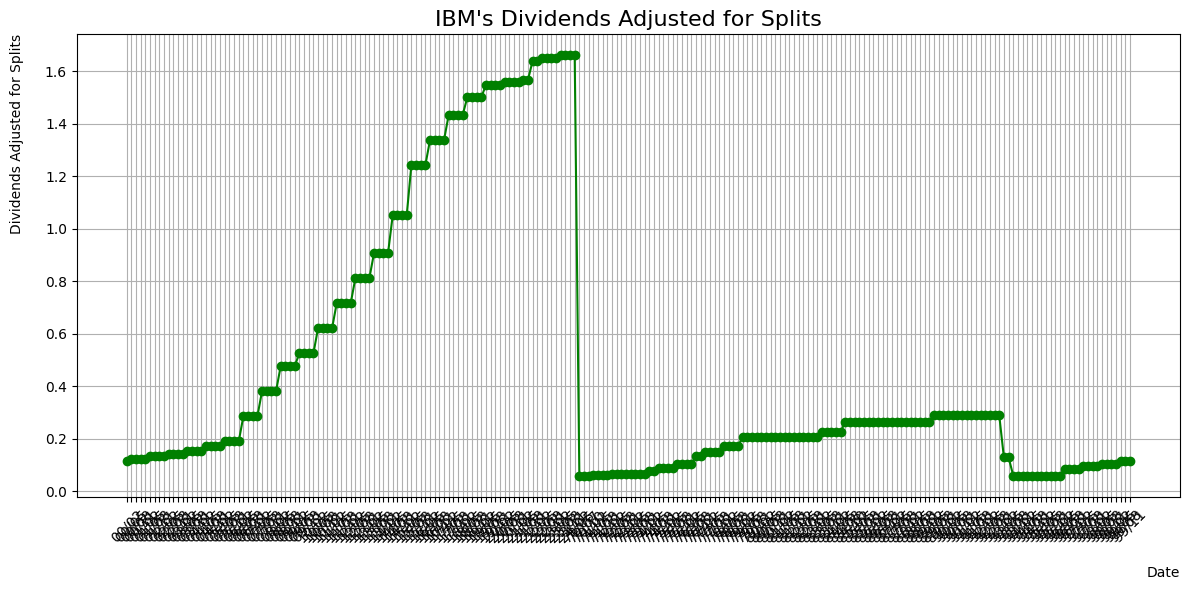

In [ ]:
import matplotlib.ticker as mticker

ticker_symbol = input("Enter the ticker symbol: ")

# 입력받은 티커명에 해당하는 배당금 데이터 추출
if ticker_symbol in adjusted_df.columns:
    data_to_plot = adjusted_df[['Date', ticker_symbol]].dropna()
    data_to_plot['Date'] = pd.to_datetime(data_to_plot['Date'])
    data_to_plot['YearMonth'] = data_to_plot['Date'].dt.strftime('%y/%m')  # 'YY/MM' format

    # 중복 제거를 위해 같은 '연/월' 내에서 첫 번째 값을 선택
    data_to_plot = data_to_plot.groupby('YearMonth').first().reset_index()

    # 그래프 도출
    plt.figure(figsize=(12, 6))
    plt.plot(data_to_plot['YearMonth'], data_to_plot[ticker_symbol], marker='o', linestyle='-', color='green')

    # 가로축 눈금 설정
    date_range = pd.date_range(start=data_to_plot['Date'].min(), end=data_to_plot['Date'].max(), freq='AS')  # 연간 간격

    # 세로축 눈금 설정
    plt.gca().yaxis.set_major_locator(mticker.AutoLocator())

    # 그래프 제목 및 축 이름 설정
    plt.title(f"{ticker_symbol}'s Dividends Adjusted for Splits", fontsize=16)

    # 축 이름을 맨 끝으로 이동
    ax = plt.gca()
    plt.xlabel('Date', labelpad=15, ha='right', position=(1,0))
    plt.ylabel('Dividends Adjusted for Splits', labelpad=15, ha='right', position=(0,1))

    # 그래프 표시
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"No data available for ticker {ticker_symbol}.")


## **이때 샀다면!**

In [ ]:
# 티커명 & 매수 시점 입력
ticker_symbol = input("Enter the ticker symbol: ")
purchase_date = input("Enter the purchase date (YYYY-MM-DD): ")

# 매수 시점 이후의 배당금 합산
if ticker_symbol in adjusted_df.columns:
    # 날짜 형식을 datetime으로 변환
    adjusted_df['Date'] = pd.to_datetime(adjusted_df['Date'])
    purchase_date = pd.to_datetime(purchase_date)

    # 매수 시점 이후 데이터 필터링
    dividends_after_purchase = adjusted_df.loc[adjusted_df['Date'] >= purchase_date, [ticker_symbol]]

    # 배당금 합산
    total_dividends = dividends_after_purchase[ticker_symbol].sum()

    print(f"Total dividends received for {ticker_symbol} since {purchase_date.date()}: ${total_dividends:.2f}")
else:
    print(f"No data available for ticker {ticker_symbol}.")


Enter the ticker symbol: ABBV
Enter the purchase date (YYYY-MM-DD): 2013-01-01
Total dividends received for ABBV since 2013-01-01: $41.02
